In [2]:
# %%
# Create the data
# ---------------
%matplotlib widget
import matplotlib.pyplot as plt


import numpy as np

from scipy import stats

e = np.exp(1)
np.random.seed(4)


def pdf(x):
    return 0.5 * (stats.norm(scale=0.25 / e).pdf(x) + stats.norm(scale=4 / e).pdf(x))


y = np.random.normal(scale=0.5, size=(30000))
x = np.random.normal(scale=0.5, size=(30000))
z = np.random.normal(scale=0.1, size=len(x))

density = pdf(x) * pdf(y)
pdf_z = pdf(5 * z)

density *= pdf_z

a = x + y
b = 2 * y
c = a - b + z

norm = np.sqrt(a.var() + b.var())
a /= norm
b /= norm

print(type(a))

ModuleNotFoundError: No module named 'ipympl'

Solving using Numpy's Eigen Decomposition

In [ ]:
a_new = (a - np.mean(a)) #/ np.std(a)
b_new = (b - np.mean(b)) #/ np.std(b)
c_new = (c - np.mean(c)) #/ np.std(c)

X = np.array(list(zip(a_new, b_new, c_new)))
print(X.shape)
P = (1/X.shape[0])*(np.matmul(np.transpose(X),X))
print(P)


(30000, 3)
[[ 0.33474791  0.33247158  0.00269064]
 [ 0.33247158  0.66525209 -0.40517837]
 [ 0.00269064 -0.40517837  0.50640658]]


In [ ]:
eig_val,eig_vec = np.linalg.eig(P)
print(eig_val)
print(eig_vec.T)

[1.09076684 0.41317547 0.00246427]
[[-0.33847725 -0.77400604  0.53511475]
 [-0.7109608  -0.1621726  -0.68427684]
 [-0.61641536  0.61205775  0.49539622]]


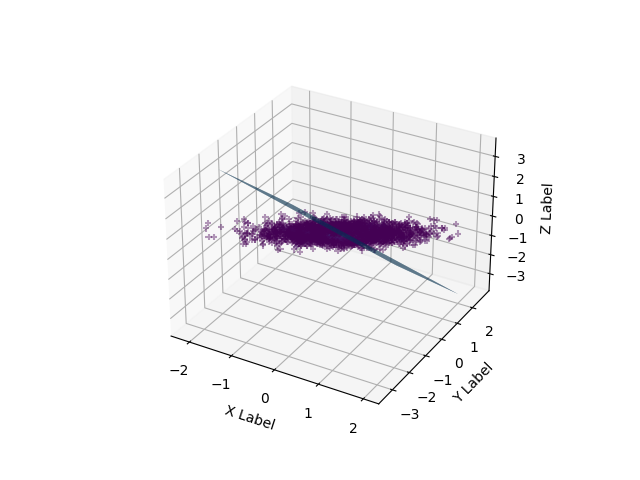

In [ ]:
x=np.linspace(-2,2,100)
y=np.linspace(-2,2,100)
X1, Y1 = np.meshgrid(x,y)
norm_vec=np.cross(eig_vec[1],eig_vec[2])
Z1=(-1)*(X1*norm_vec[0]+Y1*norm_vec[1])/norm_vec[2]

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')




ax.plot_surface(X1, Y1, Z1)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

ax.scatter(a[::10], b[::10], c[::10], c=density[::10], marker="+", alpha=0.4)

plt.show()


In [ ]:
# multipling Y with eigenvector matrix

transformed_data = np.matmul(X,eig_vec)
print(transformed_data)

[[ 0.07516141 -0.55977298  0.01521734]
 [-0.39270733 -0.95074153 -0.07755313]
 [ 1.0972232  -0.37718145 -0.04688727]
 ...
 [-0.6338038   0.14862112  0.09847446]
 [-1.02153591  0.12754035 -0.09456706]
 [-0.71819808 -0.48397321 -0.01576263]]



dgdfjvjng
[[-0.33847725 -0.7109608  -0.61641536]
 [-0.77400604 -0.1621726   0.61205775]
 [ 0.53511475 -0.68427684  0.49539622]]



x_pca_plane.shape = (3,)
x_pca_plane = [-1.01543176 -2.13288239 -1.84924608]

x_pca_plane.shape = (4,)
x_pca_plane = [-1.01543176 -2.13288239  2.13288239  1.01543176]

x_pca_plane.shape = (2, 2)
x_pca_plane = [[-1.01543176 -2.13288239]
 [ 2.13288239  1.01543176]]


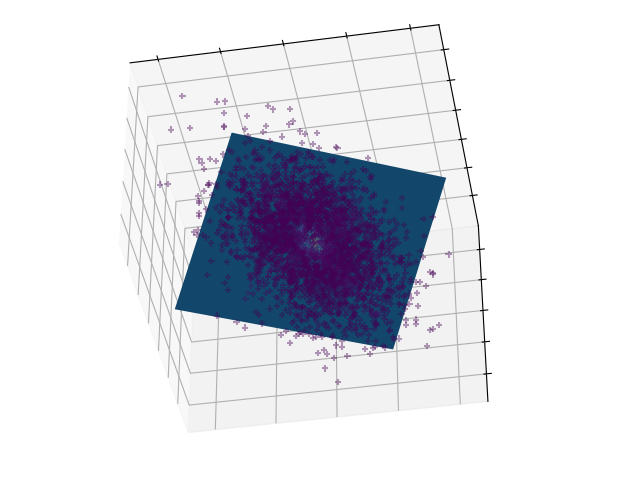


dgdfjvjng
[[-0.33847725 -0.7109608  -0.61641536]
 [-0.77400604 -0.1621726   0.61205775]
 [ 0.53511475 -0.68427684  0.49539622]]



x_pca_plane.shape = (3,)
x_pca_plane = [-1.01543176 -2.13288239 -1.84924608]

x_pca_plane.shape = (4,)
x_pca_plane = [-1.01543176 -2.13288239  2.13288239  1.01543176]

x_pca_plane.shape = (2, 2)
x_pca_plane = [[-1.01543176 -2.13288239]
 [ 2.13288239  1.01543176]]


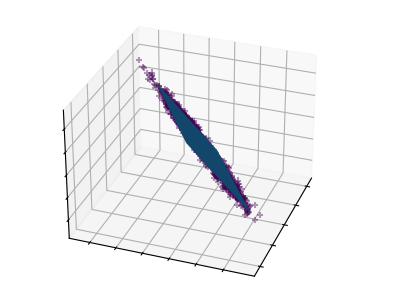

In [ ]:

import copy
def plot_figs(fig_num, elev, azim):
    fig = plt.figure(fig_num, figsize=(4, 3))
    plt.clf()
    ax = fig.add_subplot(111, projection="3d", elev=elev, azim=azim)
    ax.set_position([0, 0, 0.95, 1])

    ax.scatter(a_new[::10], b_new[::10], c_new[::10], c=density[::10], marker="+", alpha=0.4)
    Y = np.c_[a, b, c]
    

    # Using SciPy's SVD, this would be:
    # _, pca_score, Vt = scipy.linalg.svd(Y, full_matrices=False)

    
    # V = copy.deepcopy(eig_vec)
    V = eig_vec
    V[2] = 1*V[2]
    print(f"\ndgdfjvjng\n{V}\n\n")
    

    x_pca_axis, y_pca_axis, z_pca_axis =  3 * V

    print()
    print(f"x_pca_plane.shape = {x_pca_axis.shape}")
    print(f"x_pca_plane = {x_pca_axis}")
    print()

    x_pca_plane = np.r_[x_pca_axis[:2], -x_pca_axis[1::-1]]
    y_pca_plane = np.r_[y_pca_axis[:2], -y_pca_axis[1::-1]]
    z_pca_plane = np.r_[z_pca_axis[:2], -z_pca_axis[1::-1]]

    print(f"x_pca_plane.shape = {x_pca_plane.shape}")
    print(f"x_pca_plane = {x_pca_plane}")
    x_pca_plane.shape = (2, 2)
    y_pca_plane.shape = (2, 2)
    z_pca_plane.shape = (2, 2)
    print()
    print(f"x_pca_plane.shape = {x_pca_plane.shape}")
    print(f"x_pca_plane = {x_pca_plane}")
    ax.plot_surface(x_pca_plane, y_pca_plane, z_pca_plane)
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.zaxis.set_ticklabels([])


elev = -40
azim = -80
plot_figs(1, elev, azim)
plt.show()

elev = 30
azim = 20
plot_figs(2, elev, azim)

plt.show()
